In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve

import warnings
warnings.filterwarnings('ignore')

#%%

raw_data = pd.read_csv(r'C:\Users\saran\Desktop\up-skill\PGP - DSBA\Data Mining\US_Heart_Patients.csv')

raw_data.head()


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [3]:

raw_data.describe().T
raw_data.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [4]:
cont_col = ['age','cigsPerDay','tot cholesterol','Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']

raw_data[cont_col].skew()

age                0.228980
cigsPerDay         1.247912
tot cholesterol    0.873634
Systolic BP        1.144616
Diastolic BP       0.712693
BMI                0.982522
heartRate          0.630295
glucose            6.217639
dtype: float64

In [5]:
raw_data['Heart-Att'].value_counts(normalize = True)

0    0.848113
1    0.151887
Name: Heart-Att, dtype: float64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [7]:
# Initiate data imputation for missing values
raw_data.Gender.value_counts()

Female    2414
Male      1818
Name: Gender, dtype: int64

In [8]:
raw_data.Gender.fillna('Female', inplace=True)

In [9]:
raw_data.age.fillna(raw_data.age.median(),inplace =True)

In [10]:
raw_data.education.value_counts()

1.0    1717
2.0    1252
3.0     688
4.0     473
Name: education, dtype: int64

In [11]:
raw_data.education.fillna(1.0, inplace=True)

In [12]:
raw_data[(raw_data['currentSmoker'] == 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2094 non-null   object 
 1   age              2094 non-null   float64
 2   education        2094 non-null   float64
 3   currentSmoker    2094 non-null   float64
 4   cigsPerDay       2063 non-null   float64
 5   BP Meds          2070 non-null   float64
 6   prevalentStroke  2090 non-null   float64
 7   prevalentHyp     2093 non-null   float64
 8   diabetes         2094 non-null   float64
 9   tot cholesterol  2057 non-null   float64
 10  Systolic BP      2092 non-null   float64
 11  Diastolic BP     2091 non-null   float64
 12  BMI              2084 non-null   float64
 13  heartRate        2091 non-null   float64
 14  glucose          1888 non-null   float64
 15  Heart-Att        2094 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 278.1+ KB


In [13]:
df_cig = raw_data[(raw_data['currentSmoker'] == 1)]

In [14]:
df_nocig = raw_data[(raw_data['currentSmoker'] == 0)]

In [15]:
df_cig.cigsPerDay.median()
df_cig.cigsPerDay.fillna(20.0, inplace=True)

In [16]:
df_cig.info()
df_nocig.info()

df_nocig.cigsPerDay.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2094 non-null   object 
 1   age              2094 non-null   float64
 2   education        2094 non-null   float64
 3   currentSmoker    2094 non-null   float64
 4   cigsPerDay       2094 non-null   float64
 5   BP Meds          2070 non-null   float64
 6   prevalentStroke  2090 non-null   float64
 7   prevalentHyp     2093 non-null   float64
 8   diabetes         2094 non-null   float64
 9   tot cholesterol  2057 non-null   float64
 10  Systolic BP      2092 non-null   float64
 11  Diastolic BP     2091 non-null   float64
 12  BMI              2084 non-null   float64
 13  heartRate        2091 non-null   float64
 14  glucose          1888 non-null   float64
 15  Heart-Att        2094 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 278.1+ KB


array([0.])

In [17]:
df = pd.DataFrame.append(df_cig,df_nocig)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 2 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4237 non-null   object 
 1   age              4237 non-null   float64
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4237 non-null   float64
 5   BP Meds          4178 non-null   float64
 6   prevalentStroke  4228 non-null   float64
 7   prevalentHyp     4235 non-null   float64
 8   diabetes         4235 non-null   float64
 9   tot cholesterol  4177 non-null   float64
 10  Systolic BP      4233 non-null   float64
 11  Diastolic BP     4232 non-null   float64
 12  BMI              4213 non-null   float64
 13  heartRate        4233 non-null   float64
 14  glucose          3846 non-null   float64
 15  Heart-Att        4237 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 562.7+ KB


In [19]:
df[(df['prevalentHyp'] == 1)]['BP Meds'].unique()

array([ 0., nan,  1.])

In [20]:
df[(df['prevalentHyp'] == 1)]['BP Meds'].value_counts()

0.0    1166
1.0     124
Name: BP Meds, dtype: int64

In [21]:
df['BP Meds'].fillna(0, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 2 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4237 non-null   object 
 1   age              4237 non-null   float64
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4237 non-null   float64
 5   BP Meds          4237 non-null   float64
 6   prevalentStroke  4228 non-null   float64
 7   prevalentHyp     4235 non-null   float64
 8   diabetes         4235 non-null   float64
 9   tot cholesterol  4177 non-null   float64
 10  Systolic BP      4233 non-null   float64
 11  Diastolic BP     4232 non-null   float64
 12  BMI              4213 non-null   float64
 13  heartRate        4233 non-null   float64
 14  glucose          3846 non-null   float64
 15  Heart-Att        4237 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 562.7+ KB


In [23]:
df['prevalentStroke'].unique()

array([ 0., nan,  1.])

In [24]:
df['prevalentStroke'].value_counts()

0.0    4203
1.0      25
Name: prevalentStroke, dtype: int64

In [25]:
df['prevalentStroke'].fillna(0, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 2 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4237 non-null   object 
 1   age              4237 non-null   float64
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4237 non-null   float64
 5   BP Meds          4237 non-null   float64
 6   prevalentStroke  4237 non-null   float64
 7   prevalentHyp     4235 non-null   float64
 8   diabetes         4235 non-null   float64
 9   tot cholesterol  4177 non-null   float64
 10  Systolic BP      4233 non-null   float64
 11  Diastolic BP     4232 non-null   float64
 12  BMI              4213 non-null   float64
 13  heartRate        4233 non-null   float64
 14  glucose          3846 non-null   float64
 15  Heart-Att        4237 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 562.7+ KB


In [27]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [28]:
df['prevalentHyp'].value_counts()

0.0    2921
1.0    1314
Name: prevalentHyp, dtype: int64

In [29]:
df['prevalentHyp'].unique()

array([ 0.,  1., nan])

In [30]:
df['prevalentHyp'].fillna(0, inplace = True)

In [31]:
df['diabetes'].unique()

array([ 0.,  1., nan])

In [32]:
df['diabetes'].value_counts()

0.0    4126
1.0     109
Name: diabetes, dtype: int64

In [33]:
df['diabetes'].fillna(0, inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 2 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4237 non-null   object 
 1   age              4237 non-null   float64
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4237 non-null   float64
 5   BP Meds          4237 non-null   float64
 6   prevalentStroke  4237 non-null   float64
 7   prevalentHyp     4237 non-null   float64
 8   diabetes         4237 non-null   float64
 9   tot cholesterol  4177 non-null   float64
 10  Systolic BP      4233 non-null   float64
 11  Diastolic BP     4232 non-null   float64
 12  BMI              4213 non-null   float64
 13  heartRate        4233 non-null   float64
 14  glucose          3846 non-null   float64
 15  Heart-Att        4237 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 562.7+ KB


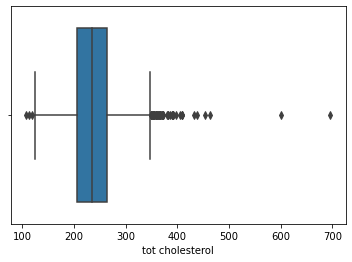

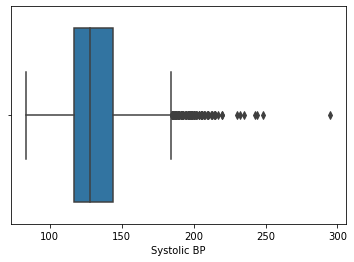

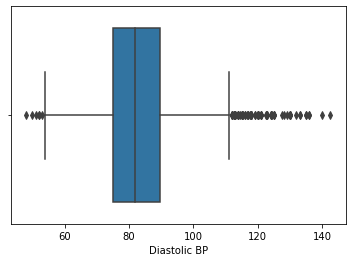

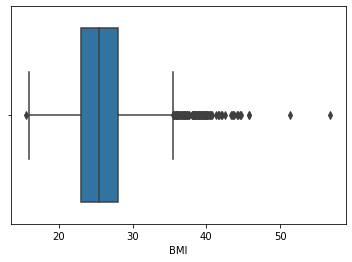

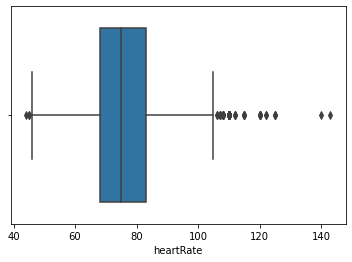

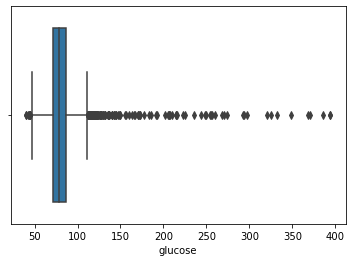

In [35]:
for x in ['tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']:
    sns.boxplot(data = df, x = x)
    plt.show()
    
    #print(x, df[x].unique(),'\n')
    #print(df[x].mode())

In [36]:
for x in ['tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate']:
    var_median = df[x].median()
    df[x].fillna(var_median, inplace = True)    

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 2 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4237 non-null   object 
 1   age              4237 non-null   float64
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4237 non-null   float64
 5   BP Meds          4237 non-null   float64
 6   prevalentStroke  4237 non-null   float64
 7   prevalentHyp     4237 non-null   float64
 8   diabetes         4237 non-null   float64
 9   tot cholesterol  4237 non-null   float64
 10  Systolic BP      4237 non-null   float64
 11  Diastolic BP     4237 non-null   float64
 12  BMI              4237 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3846 non-null   float64
 15  Heart-Att        4237 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 562.7+ KB


In [38]:
df[(df['diabetes'] == 1)]['glucose'].median()

145.0

In [39]:
df[(df['diabetes'] == 0)]['glucose'].median()

78.0

In [40]:
df[(df['diabetes'] == 1)]['glucose'].value_counts().sum()

105

In [41]:
df[(df['diabetes'] == 0)]['glucose'].value_counts().sum()

3741

In [42]:
df_with_dia = df[(df['diabetes'] == 1)]
df_without_dia = df[(df['diabetes'] == 0)]

In [43]:
df_with_dia['glucose'].fillna(145,inplace = True)

In [44]:
df_without_dia['glucose'].fillna(78,inplace = True)

In [45]:
df = pd.DataFrame.append(df_with_dia,df_without_dia)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 56 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4237 non-null   object 
 1   age              4237 non-null   float64
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4237 non-null   float64
 5   BP Meds          4237 non-null   float64
 6   prevalentStroke  4237 non-null   float64
 7   prevalentHyp     4237 non-null   float64
 8   diabetes         4237 non-null   float64
 9   tot cholesterol  4237 non-null   float64
 10  Systolic BP      4237 non-null   float64
 11  Diastolic BP     4237 non-null   float64
 12  BMI              4237 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4237 non-null   float64
 15  Heart-Att        4237 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 562.7+ KB

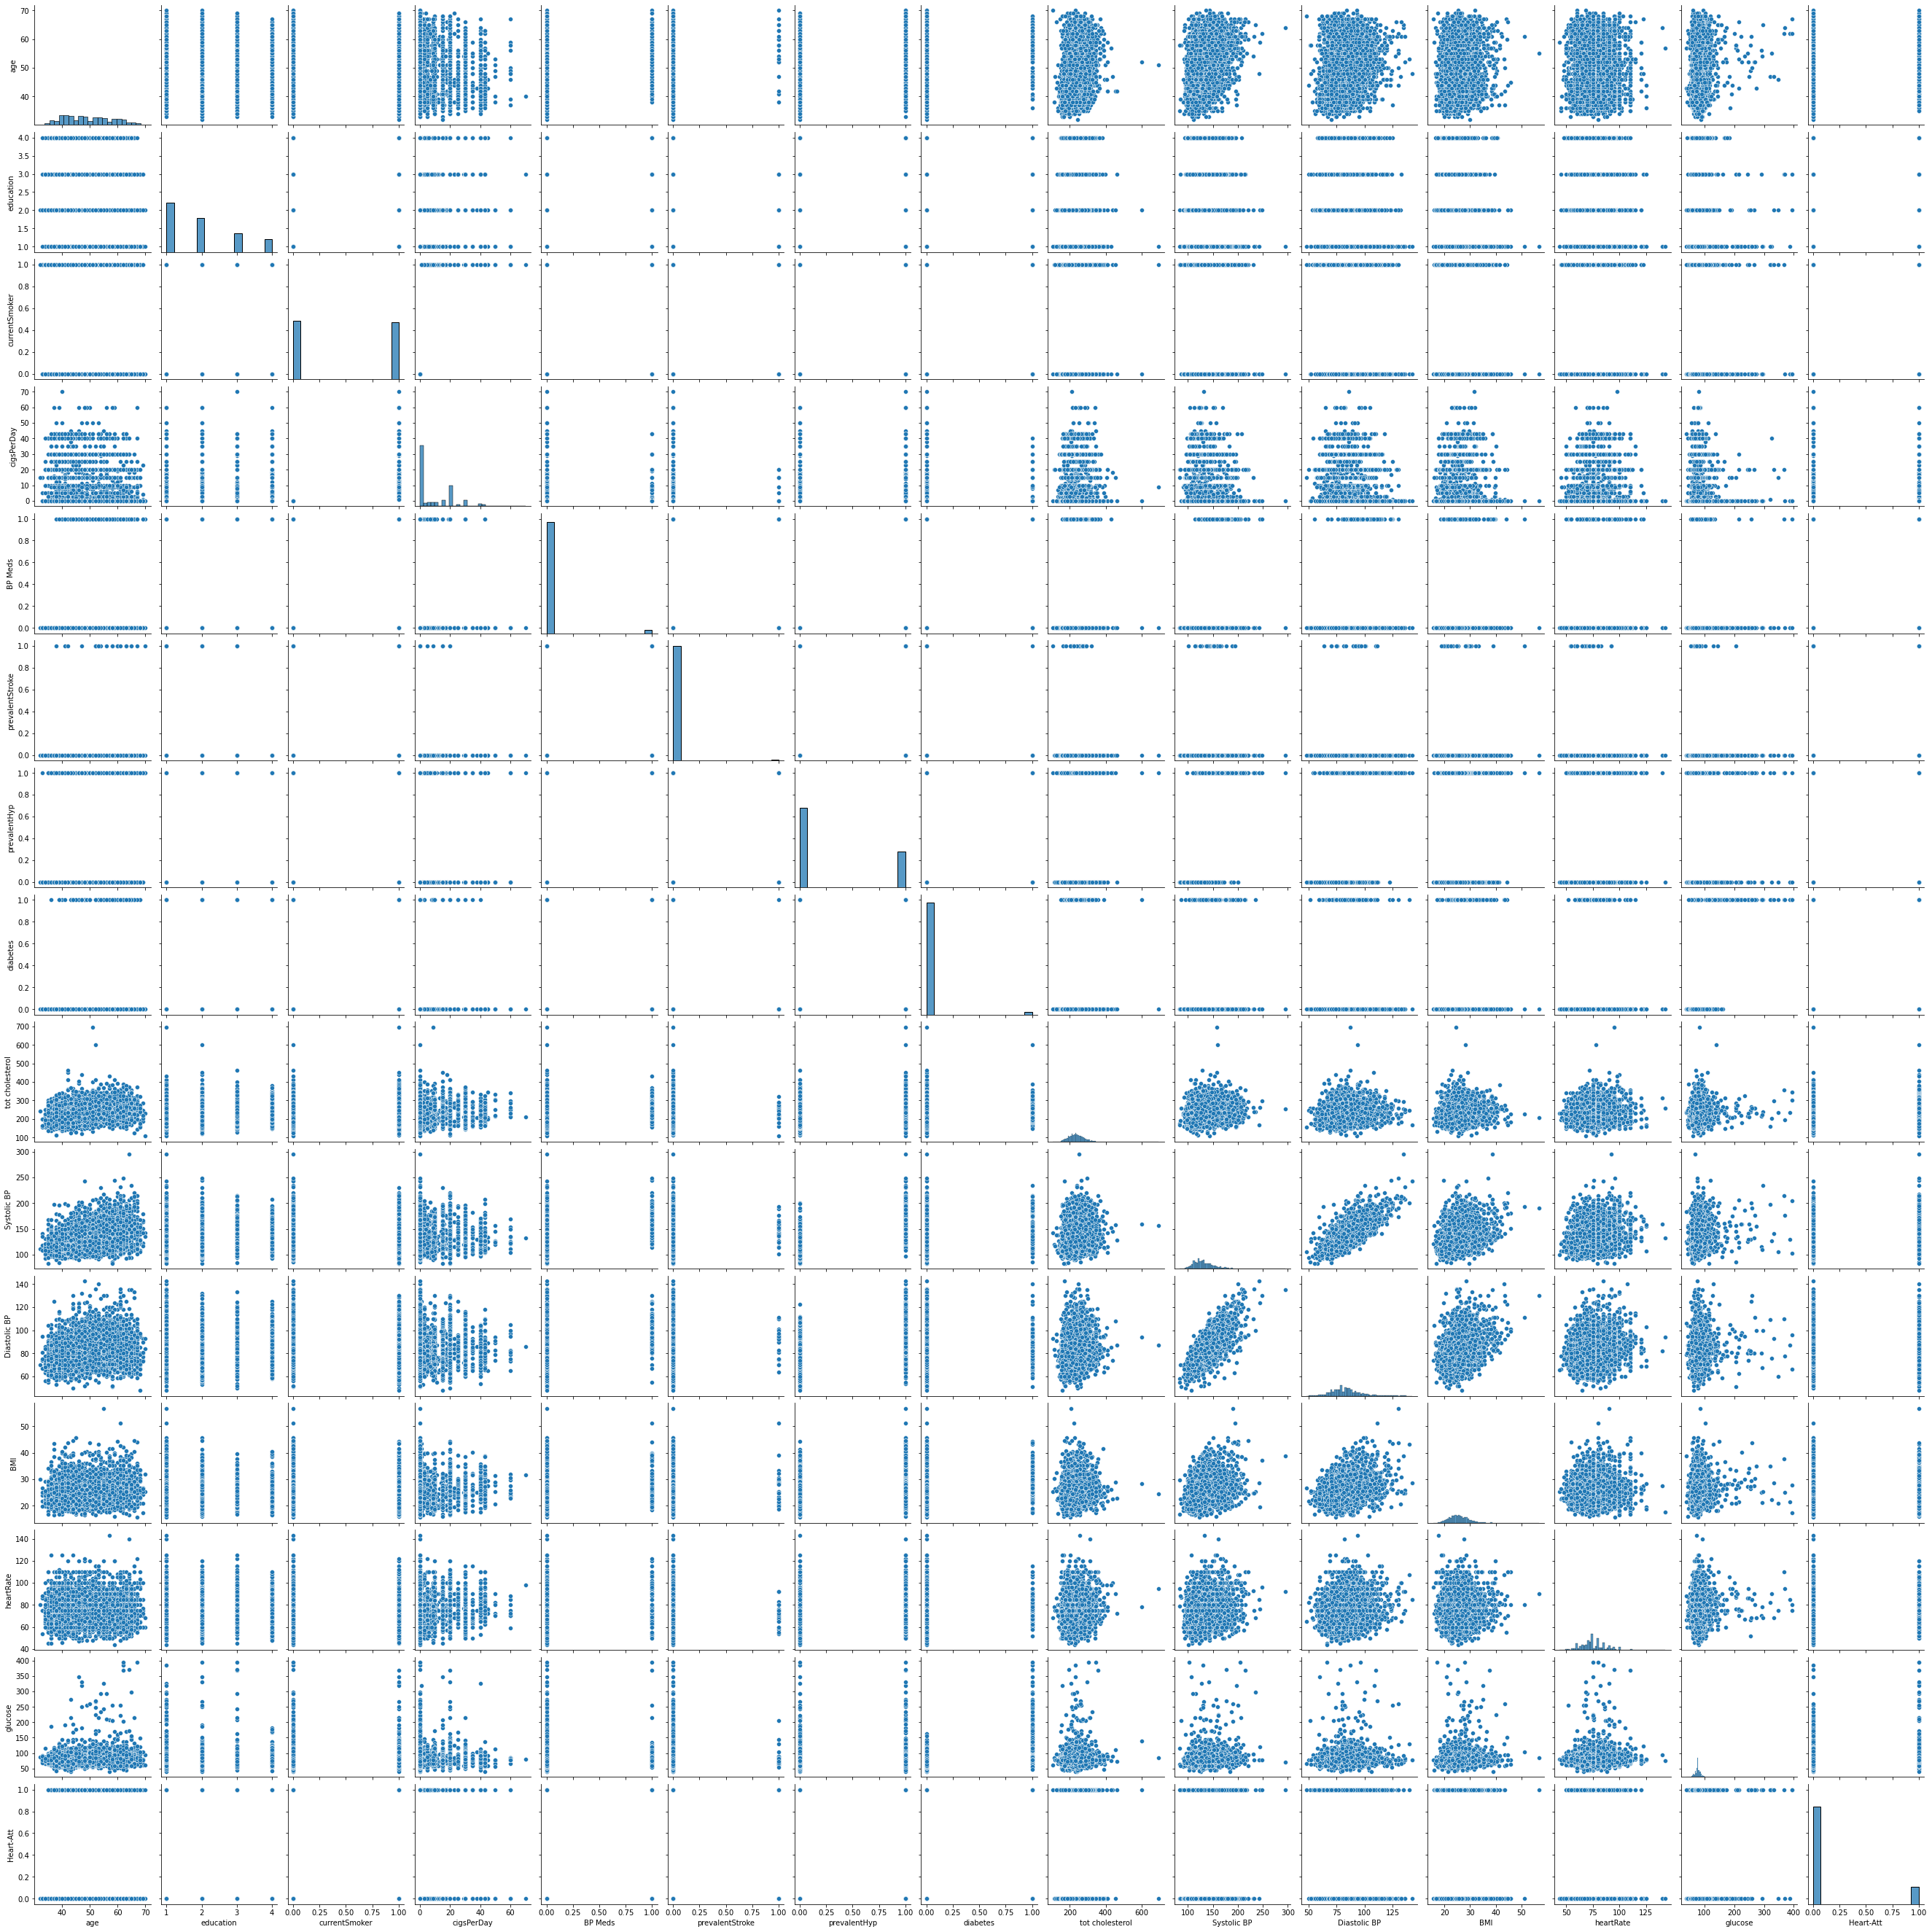

In [47]:
sns.pairplot(df)

### Building the model

In [48]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [49]:
X = df.drop({'Heart-Att'}, axis=1)

y = df.pop('Heart-Att')

In [50]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

In [51]:
rfcl = RandomForestClassifier(n_estimators=500,
                                max_depth=10, max_features = 5,
                                min_samples_leaf=10,
                                min_samples_split = 30,
                                oob_score=True)

In [52]:
rfcl = rfcl.fit(X_train,train_labels)

In [53]:
rfcl.oob_score_

0.8448566610455311

In [54]:
prm_rng = [100,200,300,400,500]

train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = train_labels, 
                                param_name = 'n_estimators', 
                                param_range = prm_rng, cv = 10)

In [55]:
train_scoreNum

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99962533, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [56]:
test_scoreNum

array([[0.83838384, 0.84848485, 0.85185185, 0.84175084, 0.84848485,
        0.85135135, 0.85135135, 0.84121622, 0.84459459, 0.8277027 ],
       [0.84175084, 0.84175084, 0.85185185, 0.84848485, 0.84848485,
        0.84797297, 0.84797297, 0.83783784, 0.83445946, 0.83108108],
       [0.83838384, 0.83838384, 0.85185185, 0.84511785, 0.84848485,
        0.84797297, 0.85135135, 0.83445946, 0.84459459, 0.83108108],
       [0.83164983, 0.84848485, 0.85185185, 0.84511785, 0.83501684,
        0.84797297, 0.85135135, 0.84121622, 0.83445946, 0.83108108],
       [0.84175084, 0.84848485, 0.85858586, 0.84848485, 0.84848485,
        0.84459459, 0.84797297, 0.83445946, 0.84121622, 0.83445946]])

In [57]:
param_grid = {
    'n_estimators' : [100,200,300,400,500],
    'max_depth' : [10,12],
    'max_features' : [5,7],
    'min_samples_leaf' : [10],
    'min_samples_split' : [30]
}

rfcl_test = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl_test, param_grid = param_grid, cv = 3)

prop = grid_search.fit(X_train, train_labels)

In [58]:
prop.best_params_

{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 500}

In [59]:
param_grid = {
    'n_estimators' : [500,750,1000],
    'max_depth' : [12],
    'max_features' : [5],
    'min_samples_leaf' : [10,20,40],
    'min_samples_split' : [30,60,120]
}

rfcl_test = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl_test, param_grid = param_grid, cv = 3)

prop = grid_search.fit(X_train, train_labels)

In [60]:
prop.best_params_

{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 750}

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [62]:
rfcl = RandomForestClassifier(n_estimators=750,
                                max_depth=12, max_features = 5,
                                min_samples_leaf=10,
                                min_samples_split = 60,
                                oob_score=True)

In [63]:
rfcl.fit(X_train, train_labels)

RandomForestClassifier(max_depth=12, max_features=5, min_samples_leaf=10,
                       min_samples_split=60, n_estimators=750, oob_score=True)

0.8646466973082197


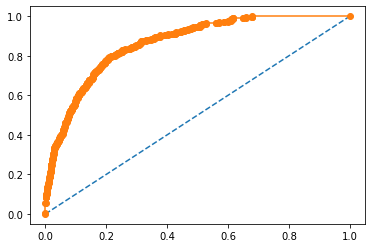

In [64]:
probs = rfcl.predict_proba(X_train)[:,1]
auc_dev = roc_auc_score(train_labels, probs)
print(auc_dev)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

0.6920038020554863


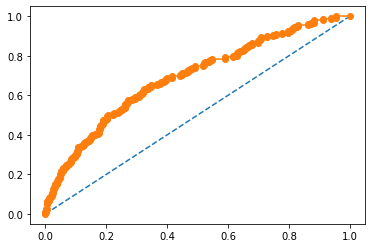

In [65]:
probt = rfcl.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(test_labels, probt)
print(auc_test)
fpr, tpr, thresholds = roc_curve(test_labels, probt)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

In [66]:
pd.DataFrame(rfcl.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)

,Imp
age,0.224205
Systolic BP,0.184031
Diastolic BP,0.110500
glucose,0.090882
tot cholesterol,0.079430
BMI,0.078478
heartRate,0.061675
prevalentHyp,0.049093
cigsPerDay,0.044319
Gender,0.044199


In [67]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [68]:
#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(rfcl.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

[[2508    0]
 [ 443   14]]
0.8505902192242834
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2508
           1       1.00      0.03      0.06       457

    accuracy                           0.85      2965
   macro avg       0.92      0.52      0.49      2965
weighted avg       0.87      0.85      0.79      2965



In [69]:
#Test data Confusion Matrix
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(rfcl.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

[[1084    2]
 [ 182    4]]
0.8553459119496856
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1086
           1       0.67      0.02      0.04       186

    accuracy                           0.86      1272
   macro avg       0.76      0.51      0.48      1272
weighted avg       0.83      0.86      0.79      1272

